# TEXT CLASSIFICATION WITH TORCHTEXT 4分类
https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html

In [ ]:
# !pip install torchtext==0.4.0

In [1]:
import torch
import torchtext
from torchtext.datasets import text_classification
NGRAMS = 2
import os
if not os.path.isdir('./.data'):
    os.mkdir('./.data')
train_dataset, test_dataset = text_classification.DATASETS['AG_NEWS'](
    root='./.data', ngrams=NGRAMS, vocab=None)
BATCH_SIZE = 16
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ag_news_csv.tar.gz: 11.8MB [00:08, 1.38MB/s]
120000lines [00:08, 13722.44lines/s]
120000lines [00:16, 7288.36lines/s]
7600lines [00:01, 7550.77lines/s]


In [2]:
import torch.nn as nn
import torch.nn.functional as F
class TextSentiment(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

# CLASSIFYING NAMES WITH A CHARACTER-LEVEL RNN
https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

In [1]:
from io import open
import glob
import os

In [2]:
fp = '../../data_origin/nlp/data/names/*.txt'

In [3]:
def findFiles(path): return glob.glob(path)

print(findFiles(fp))

['../../data_origin/nlp/data/names/Czech.txt', '../../data_origin/nlp/data/names/German.txt', '../../data_origin/nlp/data/names/Arabic.txt', '../../data_origin/nlp/data/names/Japanese.txt', '../../data_origin/nlp/data/names/Chinese.txt', '../../data_origin/nlp/data/names/Vietnamese.txt', '../../data_origin/nlp/data/names/Russian.txt', '../../data_origin/nlp/data/names/French.txt', '../../data_origin/nlp/data/names/Irish.txt', '../../data_origin/nlp/data/names/English.txt', '../../data_origin/nlp/data/names/Spanish.txt', '../../data_origin/nlp/data/names/Greek.txt', '../../data_origin/nlp/data/names/Italian.txt', '../../data_origin/nlp/data/names/Portuguese.txt', '../../data_origin/nlp/data/names/Scottish.txt', '../../data_origin/nlp/data/names/Dutch.txt', '../../data_origin/nlp/data/names/Korean.txt', '../../data_origin/nlp/data/names/Polish.txt']


In [7]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [8]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles(fp):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [9]:
all_categories

['Czech',
 'German',
 'Arabic',
 'Japanese',
 'Chinese',
 'Vietnamese',
 'Russian',
 'French',
 'Irish',
 'English',
 'Spanish',
 'Greek',
 'Italian',
 'Portuguese',
 'Scottish',
 'Dutch',
 'Korean',
 'Polish']

In [11]:
n_categories

18

In [12]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [12]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [13]:
lineToTensor('Jones')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

## build nn

In [22]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [23]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [24]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8895, -2.7949, -2.9271, -2.9507, -2.9307, -2.8860, -2.9178, -2.8247,
         -2.9570, -2.9717, -2.9293, -2.8470, -2.9227, -2.9270, -2.8164, -2.8380,
         -2.8571, -2.8629]], grad_fn=<LogSoftmaxBackward>)


In [25]:
output.topk(1)

torch.return_types.topk(
values=tensor([[-2.7949]], grad_fn=<TopkBackward>),
indices=tensor([[1]]))

In [26]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('German', 1)


In [27]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Scottish / line = Thomson
category = Portuguese / line = Torres
category = Greek / line = Antoniadis
category = English / line = Luce
category = Italian / line = Belmonte
category = German / line = Goldschmidt
category = Irish / line = O'Leary
category = Scottish / line = Kerr
category = Arabic / line = Saliba
category = French / line = Pierre


In [28]:
criterion = nn.NLLLoss()

In [22]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [23]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 8s) 2.8275 Wright / English ✗ (Scottish)
10000 10% (0m 16s) 1.1900 Kang / Chinese ✓
15000 15% (0m 24s) 1.7067 Rijnders / Portuguese ✗ (Dutch)
20000 20% (0m 32s) 3.4596 Budny / English ✗ (Polish)
25000 25% (0m 41s) 0.7537 Robertson / Scottish ✓
30000 30% (0m 50s) 1.6984 Berg / Dutch ✓
35000 35% (0m 58s) 2.4453 Stamp / Japanese ✗ (English)
40000 40% (1m 7s) 5.3379 Tobias / Arabic ✗ (German)
45000 45% (1m 16s) 0.5427 Yuan / Chinese ✓
50000 50% (1m 32s) 0.8563 Yong / Korean ✗ (Chinese)
55000 55% (2m 7s) 0.8772 Gu / Korean ✓
60000 60% (2m 20s) 4.1789 Johnston / English ✗ (Scottish)
65000 65% (2m 28s) 1.0565 Niadh / Irish ✓
70000 70% (2m 44s) 2.5481 Noschese / French ✗ (Italian)
75000 75% (2m 52s) 0.8081 Cnaimhin / Irish ✓
80000 80% (3m 0s) 2.6012 Vavra / Spanish ✗ (Czech)
85000 85% (3m 10s) 3.4499 Maneates / Portuguese ✗ (Greek)
90000 90% (3m 18s) 0.0253 Mcdonald / Scottish ✓
95000 95% (3m 27s) 0.2797 Mustafa / Arabic ✓
100000 100% (3m 36s) 2.5657 Martel / German ✗ (French)


In [25]:
%matplotlib inline

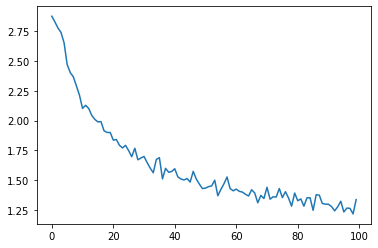

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

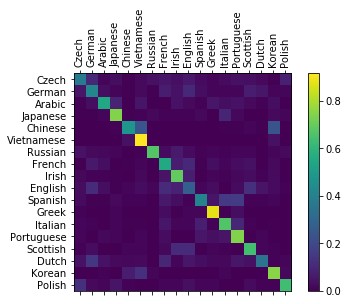

In [27]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()